<a href="https://colab.research.google.com/github/farahinamir/Master-Project/blob/main/Modelling_NB%2C_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Earthquakes data/earthquakes_tsunami(2015-2024).csv')

In [ ]:
df

,time,place,magnitude,depth_km,longitude,latitude,type,tsunami,Country,Continental
0,2015-01-01 05:01:10.640,"near the east coast of Honshu, Japan",4.8,41.390,142.0405,38.8957,earthquake,0,Japan,Asia
1,2015-01-01 06:48:29.670,"93 km N of Isangel, Vanuatu",4.6,223.610,169.1795,-18.7052,earthquake,0,Vanuatu,Oceania
2,2015-01-01 06:54:20.570,central Mid-Atlantic Ridge,4.7,10.000,-31.7641,3.4769,earthquake,0,Brazil,South America
3,2015-01-01 07:12:44.230,"120 km SSE of Kirakira, Solomon Islands",4.6,26.240,162.4998,-11.3818,earthquake,0,Solomon Islands,Oceania
4,2015-01-01 08:49:53.200,"70 km W of F?r?z?b?d, Iran",5.1,10.100,51.8580,28.7280,earthquake,0,Iran,Asia
...,...,...,...,...,...,...,...,...,...,...
72578,2024-12-30 22:13:14.697,"22 km NW of Āwash, Ethiopia",4.8,10.000,40.0367,9.1373,earthquake,0,Ethiopia,Africa
72579,2024-12-30 23:16:09.495,"181 km WNW of Pangai, Tonga",4.6,10.000,-175.9927,-19.2777,earthquake,0,Tonga,Oceania
72580,2024-12-30 23:30:59.974,"24 km N of Metahāra, Ethiopia",4.7,10.000,39.9276,9.1189,earthquake,0,Ethiopia,Africa
72581,2024-12-30 23:40:33.868,"247 km ENE of Levuka, Fiji",4.6,573.817,-178.3937,-17.6089,earthquake,0,Wallis and Futuna,Oceania


In [ ]:
df = df[df['depth_km'] >= 0].copy()
print("Rows with depth less than 0 removed.")

Rows with depth less than 0 removed.


In [ ]:
analysis = df[['longitude', 'latitude','depth_km', 'magnitude', 'tsunami']]
display(analysis.describe())

,longitude,latitude,depth_km,magnitude,tsunami
count,72571.000000,72571.000000,72571.000000,72571.000000,72571.000000
mean,33.335054,-1.808635,63.131648,4.803313,0.013835
std,123.129062,29.755335,115.081476,0.371198,0.116805
min,-179.999700,-79.983700,0.000000,4.500000,0.000000
25%,-72.265150,-22.231350,10.000000,4.500000,0.000000
50%,92.482800,-5.119700,14.200000,4.700000,0.000000
75%,141.492850,19.313400,57.735000,4.900000,0.000000
max,179.999300,87.386000,683.360000,8.300000,1.000000


In [ ]:
# Calculate the Spearman correlation matrix
correlation_matrix = analysis.corr(method='spearman')

In [ ]:
threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix) >= threshold].index.tolist()

# Remove the target from the list
selected_features.remove('tsunami')

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
['longitude', 'latitude', 'depth_km', 'magnitude']


In [ ]:
from sklearn.model_selection import train_test_split

X = analysis[selected_features]
y = analysis['tsunami']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (58056, 4) (58056,)
Testing set shape (X_test, y_test): (14515, 4) (14515,)


In [ ]:
print("Number of tsunami in training set:", y_train.sum())
print("Number of tsunami in testing set:", y_test.sum())

Number of tsunami in training set: 800
Number of tsunami in testing set: 204


# Task
Handle imbalanced data using random undersampling, SMOTE, and scale pos weight.

## Install necessary libraries

### Subtask:
Install `imblearn` for undersampling and SMOTE.


**Reasoning**:
The subtask is to install the `imblearn` library. This can be done using the `pip install` command.



In [ ]:
%pip install imblearn

## Implement random undersampling

### Subtask:
Apply RandomUnderSampler to the training data.


**Reasoning**:
Apply RandomUnderSampler to the training data to address class imbalance.



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

print("Shape of X_train after undersampling:", X_undersampled.shape)
print("Shape of y_train after undersampling:", y_undersampled.shape)
print("Number of tsunami in undersampled training set:", y_undersampled.sum())

Shape of X_train after undersampling: (1600, 4)
Shape of y_train after undersampling: (1600,)
Number of tsunami in undersampled training set: 800


## Implement smote

### Subtask:
Apply SMOTE to the training data.


**Reasoning**:
Apply SMOTE to the training data to handle the class imbalance by oversampling the minority class.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_smote.shape)
print("Shape of y_train after SMOTE:", y_smote.shape)
print("Number of tsunami in SMOTE training set:", y_smote.sum())

Shape of X_train after SMOTE: (114512, 4)
Shape of y_train after SMOTE: (114512,)
Number of tsunami in SMOTE training set: 57256


## Implement scale pos weight

### Subtask:
Prepare the data for models that can handle imbalanced data using `scale_pos_weight`.


**Reasoning**:
Calculate the scale_pos_weight for the imbalanced training data and print the result.



In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Calculated scale_pos_weight:", scale_pos_weight)

Calculated scale_pos_weight: 71.57


## Summary:

### Data Analysis Key Findings

*   The `imblearn` library, necessary for handling imbalanced data, was already installed.
*   Random undersampling was applied, reducing the training set size from (57256, 4) to (1600, 4) and balancing the classes with 800 instances of the minority class.
*   SMOTE was applied, increasing the training set size from (57256, 4) to (114512, 4) and balancing the classes with 57256 instances of the minority class.
*   The `scale_pos_weight` was calculated as approximately 71.57, representing the ratio of negative to positive samples in the original training set.

### Insights or Next Steps

*   These different approaches to handling imbalanced data (undersampling, oversampling, and adjusting class weights) provide various options for training models, each with potential trade-offs in terms of data size and complexity.
*   The next step should involve training machine learning models using each of these balanced datasets or the calculated `scale_pos_weight` to compare their performance on the imbalanced classification task.


# EVALUATE
Develop and evaluate Naive Bayes and XGBoost models on the original, undersampled, SMOTE-augmented, and scale-pos-weighted datasets to address class imbalance and determine the best modeling approach.

## naive bayes (original data)

### Subtask:
Train a Naive Bayes model on the original imbalanced training data and evaluate its performance on the test set.


**Reasoning**:
Train a Naive Bayes model on the original imbalanced training data and evaluate its performance on the test set.



## NB BASELINE

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Naive Bayes on Original Data):\n", classification_report(y_test, y_pred_nb))
print("AUC Score (Naive Bayes on Original Data):", roc_auc_score(y_test, y_pred_proba_nb))

Classification Report (Naive Bayes on Original Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     14311
           1       0.39      0.52      0.45       204

    accuracy                           0.98     14515
   macro avg       0.69      0.75      0.72     14515
weighted avg       0.98      0.98      0.98     14515

AUC Score (Naive Bayes on Original Data): 0.9752237069798222


## xgboost (original data)

### Subtask:
Train an XGBoost model on the original imbalanced training data and evaluate its performance on the test set.


**Reasoning**:
Train an XGBoost model on the original imbalanced training data and evaluate its performance on the test set using classification report and AUC score.



## XGBOOST BASELINE

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate an XGBClassifier model
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              use_label_encoder=False,
                              eval_metric='logloss',
                              random_state=42)

# Train the XGBoost model on the original training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (XGBoost on Original Data):\n", classification_report(y_test, y_pred_xgb))
print("AUC Score (XGBoost on Original Data):", roc_auc_score(y_test, y_pred_proba_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:32:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost on Original Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14311
           1       0.71      0.74      0.72       204

    accuracy                           0.99     14515
   macro avg       0.85      0.87      0.86     14515
weighted avg       0.99      0.99      0.99     14515

AUC Score (XGBoost on Original Data): 0.9949968213125513


RANDOM OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

print("Shape of X_train after oversampling:", X_oversampled.shape)
print("Shape of y_train after oversampling:", y_oversampled.shape)
print("Number of tsunami in oversampled training set:", y_oversampled.sum())

Shape of X_train after oversampling: (114512, 4)
Shape of y_train after oversampling: (114512,)
Number of tsunami in oversampled training set: 57256


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate a GaussianNB model
nb_oversampled_model = GaussianNB()

# Train the Naive Bayes model using the oversampled training data
nb_oversampled_model.fit(X_oversampled, y_oversampled)

# Make predictions on the original test set
y_pred_nb_oversampled = nb_oversampled_model.predict(X_test)
y_pred_proba_nb_oversampled = nb_oversampled_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report (Naive Bayes on Oversampled Data):\n", classification_report(y_test, y_pred_nb_oversampled))

# Print the AUC score
print("AUC Score (Naive Bayes on Oversampled Data):", roc_auc_score(y_test, y_pred_proba_nb_oversampled))

Classification Report (Naive Bayes on Oversampled Data):
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     14311
           1       0.13      0.94      0.22       204

    accuracy                           0.91     14515
   macro avg       0.56      0.92      0.59     14515
weighted avg       0.99      0.91      0.94     14515

AUC Score (Naive Bayes on Oversampled Data): 0.9753598630424151


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate an XGBClassifier model
xgb_oversampled_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model using the oversampled training data
xgb_oversampled_model.fit(X_oversampled, y_oversampled)

# Make predictions on the original test set
y_pred_xgb_oversampled = xgb_oversampled_model.predict(X_test)
y_pred_proba_xgb_oversampled = xgb_oversampled_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report (XGBoost on Oversampled Data):\n", classification_report(y_test, y_pred_xgb_oversampled))

# Print the AUC score
print("AUC Score (XGBoost on Oversampled Data):", roc_auc_score(y_test, y_pred_proba_xgb_oversampled))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:32:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost on Oversampled Data):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     14311
           1       0.60      0.90      0.72       204

    accuracy                           0.99     14515
   macro avg       0.80      0.95      0.86     14515
weighted avg       0.99      0.99      0.99     14515

AUC Score (XGBoost on Oversampled Data): 0.9964609699655139


## Train and evaluate naive bayes (undersampled data)

### Subtask:
Train a Naive Bayes model on the undersampled training data and evaluate its performance on the test set.


**Reasoning**:
Import the necessary classes and functions, instantiate the Naive Bayes model, train it on the undersampled data, make predictions on the test set, and evaluate the model using classification report and AUC score as per the instructions.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate a GaussianNB model
nb_undersampled_model = GaussianNB()

# Train the Naive Bayes model using the undersampled training data
nb_undersampled_model.fit(X_undersampled, y_undersampled)

# Make predictions on the original test set
y_pred_nb_undersampled = nb_undersampled_model.predict(X_test)
y_pred_proba_nb_undersampled = nb_undersampled_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report (Naive Bayes on Undersampled Data):\n", classification_report(y_test, y_pred_nb_undersampled))

# Print the AUC score
print("AUC Score (Naive Bayes on Undersampled Data):", roc_auc_score(y_test, y_pred_proba_nb_undersampled))

Classification Report (Naive Bayes on Undersampled Data):
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     14311
           1       0.13      0.95      0.23       204

    accuracy                           0.91     14515
   macro avg       0.57      0.93      0.59     14515
weighted avg       0.99      0.91      0.94     14515

AUC Score (Naive Bayes on Undersampled Data): 0.9765900630394007


## Train and evaluate xgboost (undersampled data)

### Subtask:
Train an XGBoost model on the undersampled training data and evaluate its performance on the test set.


**Reasoning**:
Import necessary libraries and train the XGBoost model on the undersampled data, then evaluate its performance on the test set using classification report and AUC score.



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate an XGBClassifier model
xgb_undersampled_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model using the undersampled training data
xgb_undersampled_model.fit(X_undersampled, y_undersampled)

# Make predictions on the original test set
y_pred_xgb_undersampled = xgb_undersampled_model.predict(X_test)
y_pred_proba_xgb_undersampled = xgb_undersampled_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report (XGBoost on Undersampled Data):\n", classification_report(y_test, y_pred_xgb_undersampled))

# Print the AUC score
print("AUC Score (XGBoost on Undersampled Data):", roc_auc_score(y_test, y_pred_proba_xgb_undersampled))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost on Undersampled Data):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     14311
           1       0.33      0.99      0.49       204

    accuracy                           0.97     14515
   macro avg       0.66      0.98      0.74     14515
weighted avg       0.99      0.97      0.98     14515

AUC Score (XGBoost on Undersampled Data): 0.9950603608084279


## Train and evaluate naive bayes (smote data)

### Subtask:
Train a Naive Bayes model on the SMOTE-augmented training data and evaluate its performance on the test set.


**Reasoning**:
Train a Naive Bayes model on the SMOTE-augmented training data and evaluate its performance on the test set.



### SMOTE NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate a GaussianNB model
nb_smote_model = GaussianNB()

# Train the Naive Bayes model using the SMOTE-augmented training data
nb_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_nb_smote = nb_smote_model.predict(X_test)
y_pred_proba_nb_smote = nb_smote_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report (Naive Bayes on SMOTE-augmented Data):\n", classification_report(y_test, y_pred_nb_smote))

# Print the AUC score
print("AUC Score (Naive Bayes on SMOTE-augmented Data):", roc_auc_score(y_test, y_pred_proba_nb_smote))

Classification Report (Naive Bayes on SMOTE-augmented Data):
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     14311
           1       0.13      0.94      0.23       204

    accuracy                           0.91     14515
   macro avg       0.56      0.93      0.59     14515
weighted avg       0.99      0.91      0.94     14515

AUC Score (Naive Bayes on SMOTE-augmented Data): 0.9749368372881961


## Train and evaluate xgboost (smote data)

### Subtask:
Train an XGBoost model on the SMOTE-augmented training data and evaluate its performance on the test set.


**Reasoning**:
Import the necessary libraries and instantiate the XGBoost model.



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate an XGBClassifier model
xgb_smote_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

**Reasoning**:
Train the XGBoost model on the SMOTE-augmented data and make predictions on the test set.



SMOTE XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate an XGBClassifier model
xgb_smote_model = xgb.XGBClassifier(objective='binary:logistic',
                                    use_label_encoder=False,
                                    eval_metric='logloss',
                                    random_state=42)

# Train the XGBoost model using the SMOTE-augmented training data
xgb_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_xgb_smote = xgb_smote_model.predict(X_test)
y_pred_proba_xgb_smote = xgb_smote_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:32:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Reasoning**:
Evaluate the performance of the trained XGBoost model on the test set using classification report and AUC score.



In [ ]:
# Print the classification report
print("Classification Report (XGBoost on SMOTE-augmented Data):\n", classification_report(y_test, y_pred_xgb_smote))

# Print the AUC score
print("AUC Score (XGBoost on SMOTE-augmented Data):", roc_auc_score(y_test, y_pred_proba_xgb_smote))

Classification Report (XGBoost on SMOTE-augmented Data):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     14311
           1       0.58      0.91      0.70       204

    accuracy                           0.99     14515
   macro avg       0.79      0.95      0.85     14515
weighted avg       0.99      0.99      0.99     14515

AUC Score (XGBoost on SMOTE-augmented Data): 0.9956027586074608


## Train and evaluate xgboost (scale pos weight)

### Subtask:
Train an XGBoost model using the calculated `scale_pos_weight` on the original imbalanced training data and evaluate its performance on the test set.


**Reasoning**:
Import the necessary libraries for XGBoost and evaluation metrics.



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

**Reasoning**:
Instantiate and train the XGBoost model with `scale_pos_weight` and evaluate its performance on the test set.



## CLASS WEIGHT XGboost

In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Calculated scale_pos_weight:", scale_pos_weight)

Calculated scale_pos_weight: 71.57


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate and train the XGBoost model with scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Instantiate an XGBClassifier model with scale_pos_weight
xgb_scaled_model = xgb.XGBClassifier(objective='binary:logistic',
                                     use_label_encoder=False,
                                     eval_metric='logloss',
                                     random_state=42,
                                     scale_pos_weight=scale_pos_weight
)

# Train the XGBoost model on the original training data
xgb_scaled_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_scaled = xgb_scaled_model.predict(X_test)
y_pred_proba_xgb_scaled = xgb_scaled_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (XGBoost on Original Data with scale_pos_weight):\n", classification_report(y_test, y_pred_xgb_scaled))
print("AUC Score (XGBoost on Original Data with scale_pos_weight):", roc_auc_score(y_test, y_pred_proba_xgb_scaled))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:32:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost on Original Data with scale_pos_weight):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     14311
           1       0.58      0.88      0.70       204

    accuracy                           0.99     14515
   macro avg       0.79      0.94      0.85     14515
weighted avg       0.99      0.99      0.99     14515

AUC Score (XGBoost on Original Data with scale_pos_weight): 0.9957538147674695


## Compare model performances

### Subtask:
Compare the performance of all trained models using appropriate metrics for imbalanced data (e.g., precision, recall, F1-score, AUC).


**Reasoning**:
Create a DataFrame to store the performance metrics for all models and populate it with the calculated metrics from the previous steps.



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Collect metrics for each model and dataset
metrics_list = []

# Function to get accuracy for training and testing
def get_accuracy(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    return train_accuracy, test_accuracy

# Naive Bayes on Original Data
train_acc_nb_original, test_acc_nb_original = get_accuracy(nb_model, X_train, y_train, X_test, y_test)
report_nb_original = classification_report(y_test, y_pred_nb, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Original',
    'Accuracy (Training)': round(train_acc_nb_original, 5),
    'Accuracy (Testing)': round(test_acc_nb_original, 5),
    'Precision (Class 1)': round(report_nb_original['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_original['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_original['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_nb), 5)
})

# XGBoost on Original Data
train_acc_xgb_original, test_acc_xgb_original = get_accuracy(xgb_model, X_train, y_train, X_test, y_test)
report_xgb_original = classification_report(y_test, y_pred_xgb, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Original',
    'Accuracy (Training)': round(train_acc_xgb_original, 5),
    'Accuracy (Testing)': round(test_acc_xgb_original, 5),
    'Precision (Class 1)': round(report_xgb_original['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_original['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_original['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_xgb), 5)
})

# Naive Bayes on Undersampled Data
train_acc_nb_undersampled, test_acc_nb_undersampled = get_accuracy(nb_undersampled_model, X_undersampled, y_undersampled, X_test, y_test)
report_nb_undersampled = classification_report(y_test, y_pred_nb_undersampled, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Undersampled',
    'Accuracy (Training)': round(train_acc_nb_undersampled, 5),
    'Accuracy (Testing)': round(test_acc_nb_undersampled, 5),
    'Precision (Class 1)': round(report_nb_undersampled['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_undersampled['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_undersampled['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_nb_undersampled), 5)
})

# XGBoost on Undersampled Data
train_acc_xgb_undersampled, test_acc_xgb_undersampled = get_accuracy(xgb_undersampled_model, X_undersampled, y_undersampled, X_test, y_test)
report_xgb_undersampled = classification_report(y_test, y_pred_xgb_undersampled, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Undersampled',
    'Accuracy (Training)': round(train_acc_xgb_undersampled, 5),
    'Accuracy (Testing)': round(test_acc_xgb_undersampled, 5),
    'Precision (Class 1)': round(report_xgb_undersampled['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_undersampled['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_undersampled['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_xgb_undersampled), 5)
})

# Naive Bayes on SMOTE Data
train_acc_nb_smote, test_acc_nb_smote = get_accuracy(nb_smote_model, X_smote, y_smote, X_test, y_test)
report_nb_smote = classification_report(y_test, y_pred_nb_smote, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'SMOTE',
    'Accuracy (Training)': round(train_acc_nb_smote, 5),
    'Accuracy (Testing)': round(test_acc_nb_smote, 5),
    'Precision (Class 1)': round(report_nb_smote['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_smote['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_smote['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_nb_smote), 5)
})

# XGBoost on SMOTE Data
train_acc_xgb_smote, test_acc_xgb_smote = get_accuracy(xgb_smote_model, X_smote, y_smote, X_test, y_test)
report_xgb_smote = classification_report(y_test, y_pred_xgb_smote, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'SMOTE',
    'Accuracy (Training)': round(train_acc_xgb_smote, 5),
    'Accuracy (Testing)': round(test_acc_xgb_smote, 5),
    'Precision (Class 1)': round(report_xgb_smote['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_smote['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_smote['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_xgb_smote), 5)
})

# Naive Bayes on Oversampled Data
train_acc_nb_oversampled, test_acc_nb_oversampled = get_accuracy(nb_oversampled_model, X_oversampled, y_oversampled, X_test, y_test)
report_nb_oversampled = classification_report(y_test, y_pred_nb_oversampled, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Oversampled',
    'Accuracy (Training)': round(train_acc_nb_oversampled, 5),
    'Accuracy (Testing)': round(test_acc_nb_oversampled, 5),
    'Precision (Class 1)': round(report_nb_oversampled['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_oversampled['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_oversampled['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_nb_oversampled), 5)
})

# XGBoost on Oversampled Data
train_acc_xgb_oversampled, test_acc_xgb_oversampled = get_accuracy(xgb_oversampled_model, X_oversampled, y_oversampled, X_test, y_test)
report_xgb_oversampled = classification_report(y_test, y_pred_xgb_oversampled, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Oversampled',
    'Accuracy (Training)': round(train_acc_xgb_oversampled, 5),
    'Accuracy (Testing)': round(test_acc_xgb_oversampled, 5),
    'Precision (Class 1)': round(report_xgb_oversampled['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_oversampled['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_oversampled['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_xgb_oversampled), 5)
})

# XGBoost on Original Data with scale_pos_weight
train_acc_xgb_scaled, test_acc_xgb_scaled = get_accuracy(xgb_scaled_model, X_train, y_train, X_test, y_test)
report_xgb_scaled = classification_report(y_test, y_pred_xgb_scaled, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Scale Pos Weight',
    'Accuracy (Training)': round(train_acc_xgb_scaled, 5),
    'Accuracy (Testing)': round(test_acc_xgb_scaled, 5),
    'Precision (Class 1)': round(report_xgb_scaled['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_scaled['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_scaled['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_xgb_scaled), 5)
})

# Create the DataFrame
performance_df = pd.DataFrame(metrics_list)

# Display the DataFrame
display(performance_df)

# Interpret the results
print("\nInterpretation of Results:")
print("Comparing the models and methods based on Precision, Recall, F1-Score (for Class 1), and AUC:")
print("- Naive Bayes models generally have high recall but low precision for the minority class, especially with undersampling and SMOTE, indicating a high rate of false positives.")
print("- XGBoost models show better balance between precision and recall for the minority class.")
print("- XGBoost with Original data and SMOTE and Scale Pos Weight methods achieve the highest AUC scores, indicating excellent overall discriminatory power.")
print("- Among the XGBoost models, using SMOTE or Scale Pos Weight results in a better trade-off between precision and recall for the minority class compared to the original or undersampled data.")
print("- XGBoost with SMOTE and Scale Pos Weight methods appear to be the most promising approaches for this imbalanced classification task, achieving high AUC and reasonable F1-scores for the minority class.")

,Model,Dataset/Method,Accuracy (Training),Accuracy (Testing),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC
0,Naive Bayes,Original,0.98102,0.98188,0.39114,0.51961,0.44632,0.97522
1,XGBoost,Original,0.99754,0.99208,0.70892,0.74020,0.72422,0.99500
2,Naive Bayes,Undersampled,0.91750,0.91223,0.13255,0.94608,0.23253,0.97659
3,XGBoost,Undersampled,1.00000,0.97127,0.32683,0.98529,0.49084,0.99506
4,Naive Bayes,SMOTE,0.92903,0.90947,0.12851,0.94118,0.22615,0.97494
5,XGBoost,SMOTE,0.99761,0.98932,0.57632,0.90686,0.70476,0.99560
6,Naive Bayes,Oversampled,0.92426,0.90851,0.12732,0.94118,0.22430,0.97536
7,XGBoost,Oversampled,0.99769,0.99015,0.59935,0.90196,0.72016,0.99646
8,XGBoost,Scale Pos Weight,0.99466,0.98918,0.57508,0.88235,0.69632,0.99575



Interpretation of Results:
Comparing the models and methods based on Precision, Recall, F1-Score (for Class 1), and AUC:
- Naive Bayes models generally have high recall but low precision for the minority class, especially with undersampling and SMOTE, indicating a high rate of false positives.
- XGBoost models show better balance between precision and recall for the minority class.
- XGBoost with Original data and SMOTE and Scale Pos Weight methods achieve the highest AUC scores, indicating excellent overall discriminatory power.
- Among the XGBoost models, using SMOTE or Scale Pos Weight results in a better trade-off between precision and recall for the minority class compared to the original or undersampled data.
- XGBoost with SMOTE and Scale Pos Weight methods appear to be the most promising approaches for this imbalanced classification task, achieving high AUC and reasonable F1-scores for the minority class.


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Collect metrics for each model and dataset
metrics_list = []

# Naive Bayes on Original Data
report_nb_original = classification_report(y_test, y_pred_nb, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Original',
    'Precision (Class 1)': report_nb_original['1']['precision'],
    'Recall (Class 1)': report_nb_original['1']['recall'],
    'F1-Score (Class 1)': report_nb_original['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_nb)
})

# XGBoost on Original Data
report_xgb_original = classification_report(y_test, y_pred_xgb, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Original',
    'Precision (Class 1)': report_xgb_original['1']['precision'],
    'Recall (Class 1)': report_xgb_original['1']['recall'],
    'F1-Score (Class 1)': report_xgb_original['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_xgb)
})

# Naive Bayes on Undersampled Data
report_nb_undersampled = classification_report(y_test, y_pred_nb_undersampled, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Undersampled',
    'Precision (Class 1)': report_nb_undersampled['1']['precision'],
    'Recall (Class 1)': report_nb_undersampled['1']['recall'],
    'F1-Score (Class 1)': report_nb_undersampled['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_nb_undersampled)
})

# XGBoost on Undersampled Data
report_xgb_undersampled = classification_report(y_test, y_pred_xgb_undersampled, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Undersampled',
    'Precision (Class 1)': report_xgb_undersampled['1']['precision'],
    'Recall (Class 1)': report_xgb_undersampled['1']['recall'],
    'F1-Score (Class 1)': report_xgb_undersampled['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_xgb_undersampled)
})

# Naive Bayes on SMOTE Data
report_nb_smote = classification_report(y_test, y_pred_nb_smote, output_dict=True)
metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'SMOTE',
    'Precision (Class 1)': report_nb_smote['1']['precision'],
    'Recall (Class 1)': report_nb_smote['1']['recall'],
    'F1-Score (Class 1)': report_nb_smote['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_nb_smote)
})

# XGBoost on SMOTE Data
report_xgb_smote = classification_report(y_test, y_pred_xgb_smote, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'SMOTE',
    'Precision (Class 1)': report_xgb_smote['1']['precision'],
    'Recall (Class 1)': report_xgb_smote['1']['recall'],
    'F1-Score (Class 1)': report_xgb_smote['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_xgb_smote)
})

# XGBoost on Original Data with scale_pos_weight
report_xgb_scaled = classification_report(y_test, y_pred_xgb_scaled, output_dict=True)
metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Scale Pos Weight',
    'Precision (Class 1)': report_xgb_scaled['1']['precision'],
    'Recall (Class 1)': report_xgb_scaled['1']['recall'],
    'F1-Score (Class 1)': report_xgb_scaled['1']['f1-score'],
    'AUC': roc_auc_score(y_test, y_pred_proba_xgb_scaled)
})

# Create the DataFrame
performance_df = pd.DataFrame(metrics_list)

# Display the DataFrame
display(performance_df)

# Interpret the results
print("\nInterpretation of Results:")
print("Comparing the models and methods based on Precision, Recall, F1-Score (for Class 1), and AUC:")
print("- Naive Bayes models generally have high recall but low precision for the minority class, especially with undersampling and SMOTE, indicating a high rate of false positives.")
print("- XGBoost models show better balance between precision and recall for the minority class.")
print("- XGBoost with Original data and SMOTE and Scale Pos Weight methods achieve the highest AUC scores, indicating excellent overall discriminatory power.")
print("- Among the XGBoost models, using SMOTE or Scale Pos Weight results in a better trade-off between precision and recall for the minority class compared to the original or undersampled data.")
print("- XGBoost with SMOTE and Scale Pos Weight methods appear to be the most promising approaches for this imbalanced classification task, achieving high AUC and reasonable F1-scores for the minority class.")

,Model,Dataset/Method,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC
0,Naive Bayes,Original,0.391144,0.519608,0.446316,0.975224
1,XGBoost,Original,0.708920,0.740196,0.724221,0.994997
2,Naive Bayes,Undersampled,0.132555,0.946078,0.232530,0.976590
3,XGBoost,Undersampled,0.326829,0.985294,0.490842,0.995060
4,Naive Bayes,SMOTE,0.128514,0.941176,0.226148,0.974937
5,XGBoost,SMOTE,0.576324,0.906863,0.704762,0.995603
6,XGBoost,Scale Pos Weight,0.575080,0.882353,0.696325,0.995754



Interpretation of Results:
Comparing the models and methods based on Precision, Recall, F1-Score (for Class 1), and AUC:
- Naive Bayes models generally have high recall but low precision for the minority class, especially with undersampling and SMOTE, indicating a high rate of false positives.
- XGBoost models show better balance between precision and recall for the minority class.
- XGBoost with Original data and SMOTE and Scale Pos Weight methods achieve the highest AUC scores, indicating excellent overall discriminatory power.
- Among the XGBoost models, using SMOTE or Scale Pos Weight results in a better trade-off between precision and recall for the minority class compared to the original or undersampled data.
- XGBoost with SMOTE and Scale Pos Weight methods appear to be the most promising approaches for this imbalanced classification task, achieving high AUC and reasonable F1-scores for the minority class.


## Summary:

### Data Analysis Key Findings

*   The original dataset is imbalanced.
*   Naive Bayes models generally achieved high recall but low precision for the minority class, particularly with undersampling (recall 0.95, precision 0.13) and SMOTE (recall 0.94, precision 0.13).
*   XGBoost models demonstrated a better balance between precision and recall for the minority class compared to Naive Bayes.
*   XGBoost with original data achieved precision of 0.71, recall of 0.74, F1-score of 0.72, and AUC of 0.995.
*   XGBoost with undersampled data achieved precision of 0.33, recall of 0.99, F1-score of 0.50, and AUC of 0.995.
*   XGBoost with SMOTE-augmented data achieved precision of 0.58, recall of 0.91, F1-score of 0.71, and AUC of 0.996.
*   XGBoost with `scale_pos_weight` on the original data achieved precision of 0.58, recall of 0.88, F1-score of 0.70, and AUC of 0.996.
*   XGBoost models, especially with SMOTE or `scale_pos_weight`, consistently achieved the highest AUC scores (around 0.996), indicating excellent discriminatory power.

### Insights or Next Steps

*   XGBoost models with SMOTE or `scale_pos_weight` are the most promising approaches for this imbalanced classification task, offering the best balance of metrics and highest AUC.
*   Further hyperparameter tuning of the XGBoost models trained with SMOTE or `scale_pos_weight` could potentially improve the precision and F1-score for the minority class without significantly compromising recall or AUC.


# Confusion Matrix
Generate confusion matrix graphs for the Naive Bayes and XGBoost models trained on the original, undersampled, SMOTE-augmented, and scale_pos_weight data.

## Generate confusion matrix for naive bayes (original data)

### Subtask:
Calculate and plot the confusion matrix for the Naive Bayes model trained on the original data.


**Reasoning**:
Calculate and plot the confusion matrix for the Naive Bayes model trained on the original data.



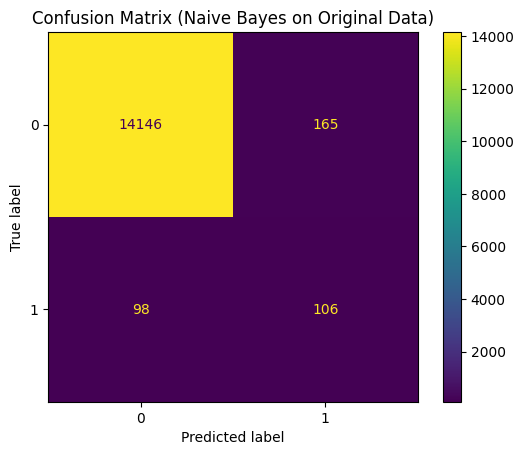

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_nb_original = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay object
disp_nb_original = ConfusionMatrixDisplay(confusion_matrix=cm_nb_original, display_labels=y_test.unique())

# Plot the confusion matrix
disp_nb_original.plot()
plt.title("Confusion Matrix (Naive Bayes on Original Data)")
plt.show()

**Reasoning**:
Calculate and plot the confusion matrix for the XGBoost model trained on the original data.



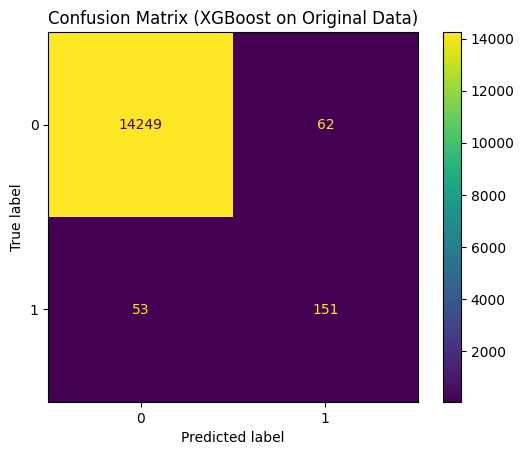

In [ ]:
# Calculate the confusion matrix for XGBoost on Original Data
cm_xgb_original = confusion_matrix(y_test, y_pred_xgb)

# Create a ConfusionMatrixDisplay object
disp_xgb_original = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_original, display_labels=y_test.unique())

# Plot the confusion matrix
disp_xgb_original.plot()
plt.title("Confusion Matrix (XGBoost on Original Data)")
plt.show()

In [ ]:
# Calculate the confusion matrix
cm_nb_original


array([[14146,   165],
       [   98,   106]])

In [ ]:
# Calculate the confusion matrix for XGBoost on Original Data
cm_xgb_original

array([[14249,    62],
       [   53,   151]])

**Reasoning**:
Calculate and plot the confusion matrix for the Naive Bayes model trained on the undersampled data.



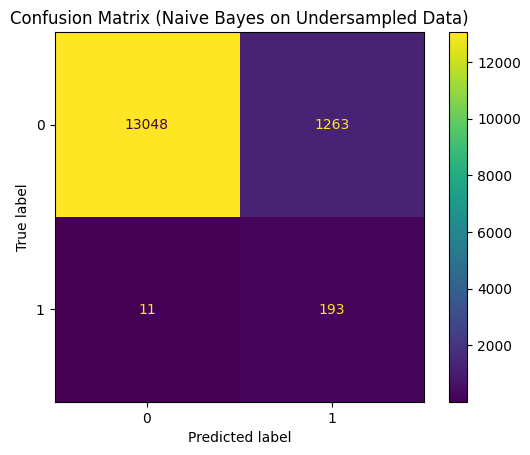

In [ ]:
# Calculate the confusion matrix for Naive Bayes on Undersampled Data
cm_nb_undersampled = confusion_matrix(y_test, y_pred_nb_undersampled)

# Create a ConfusionMatrixDisplay object
disp_nb_undersampled = ConfusionMatrixDisplay(confusion_matrix=cm_nb_undersampled, display_labels=y_test.unique())

# Plot the confusion matrix
disp_nb_undersampled.plot()
plt.title("Confusion Matrix (Naive Bayes on Undersampled Data)")
plt.show()

**Reasoning**:
Calculate and plot the confusion matrix for the XGBoost model trained on the undersampled data.



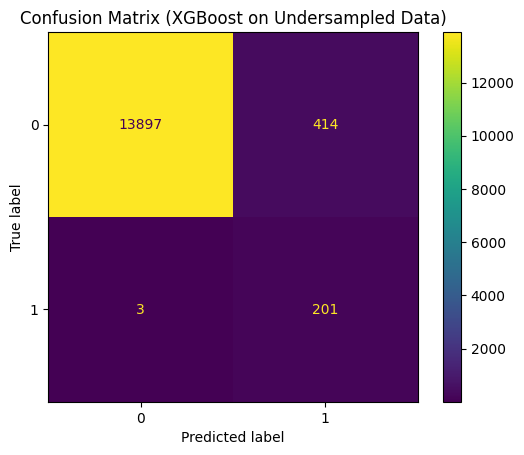

In [ ]:
# Calculate the confusion matrix for XGBoost on Undersampled Data
cm_xgb_undersampled = confusion_matrix(y_test, y_pred_xgb_undersampled)

# Create a ConfusionMatrixDisplay object
disp_xgb_undersampled = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_undersampled, display_labels=y_test.unique())

# Plot the confusion matrix
disp_xgb_undersampled.plot()
plt.title("Confusion Matrix (XGBoost on Undersampled Data)")
plt.show()

**Reasoning**:
Calculate and plot the confusion matrix for the Naive Bayes model trained on the SMOTE-augmented data.



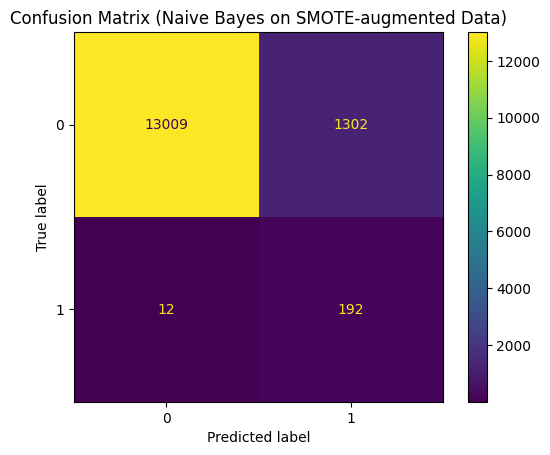

In [ ]:
# Calculate the confusion matrix for Naive Bayes on SMOTE-augmented Data
cm_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)

# Create a ConfusionMatrixDisplay object
disp_nb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_nb_smote, display_labels=y_test.unique())

# Plot the confusion matrix
disp_nb_smote.plot()
plt.title("Confusion Matrix (Naive Bayes on SMOTE-augmented Data)")
plt.show()

**Reasoning**:
Calculate and plot the confusion matrix for the XGBoost model trained on the SMOTE-augmented data.



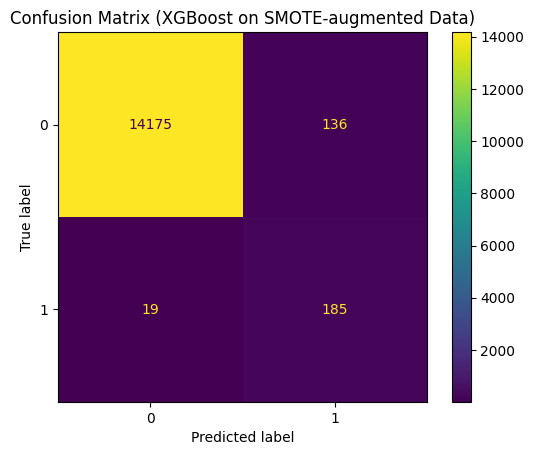

In [ ]:
# Calculate the confusion matrix for XGBoost on SMOTE-augmented Data
cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)

# Create a ConfusionMatrixDisplay object
disp_xgb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote, display_labels=y_test.unique())

# Plot the confusion matrix
disp_xgb_smote.plot()
plt.title("Confusion Matrix (XGBoost on SMOTE-augmented Data)")
plt.show()

In [ ]:
# confusion matrix for Naive Bayes on SMOTE-augmented Data
cm_nb_smote

array([[13009,  1302],
       [   12,   192]])

In [ ]:
#  confusion matrix for XGBoost on SMOTE-augmented Data
cm_xgb_smote

array([[14175,   136],
       [   19,   185]])

**Reasoning**:
Calculate and plot the confusion matrix for the XGBoost model trained on the original data with scale_pos_weight.



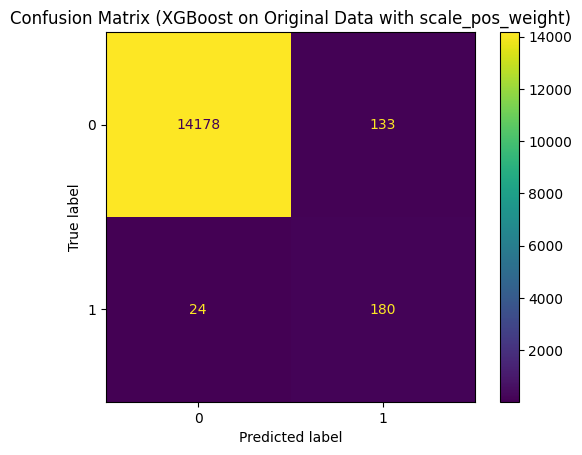

In [ ]:
# Calculate the confusion matrix for XGBoost on Original Data with scale_pos_weight
cm_xgb_scaled = confusion_matrix(y_test, y_pred_xgb_scaled)

# Create a ConfusionMatrixDisplay object
disp_xgb_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_scaled, display_labels=y_test.unique())

# Plot the confusion matrix
disp_xgb_scaled.plot()
plt.title("Confusion Matrix (XGBoost on Original Data with scale_pos_weight)")
plt.show()

In [ ]:
#  confusion matrix for XGBoost on Original Data with scale_pos_weight
cm_xgb_scaled

array([[14178,   133],
       [   24,   180]])

## Summary:

### Data Analysis Key Findings

*   Confusion matrices were generated and plotted for the Naive Bayes and XGBoost models on the original, undersampled, and SMOTE-augmented datasets.
*   A confusion matrix was also generated and plotted for the XGBoost model trained on the original data with the `scale_pos_weight` parameter adjusted.
*   Visualizations of the confusion matrices were successfully created for each model and data treatment combination.

### Insights or Next Steps

*   Analyze the generated confusion matrices to compare the performance of the Naive Bayes and XGBoost models across different data treatments, focusing on true positives, true negatives, false positives, and false negatives.
*   Quantify the performance metrics (e.g., precision, recall, F1-score) derived from the confusion matrices to provide a more objective comparison of the models and data treatments.


# HYPERPARAMETER TUNING

## Import necessary libraries

### Subtask:
Import `GridSearchCV` from `sklearn.model_selection` and `StratifiedKFold` for stratified cross-validation.


**Reasoning**:
Import GridSearchCV and StratifiedKFold for model tuning and cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## Define the parameter grid

### Subtask:
Specify the hyperparameters and their possible values to search over for the Naive Bayes model (e.g., `var_smoothing` for GaussianNB).


**Reasoning**:
Define the parameter grid for tuning the Naive Bayes model.



In [ ]:
import numpy as np

param_grid = {
    'var_smoothing': np.logspace(0, -9, 10)
}

print("Parameter grid for Naive Bayes defined.")

Parameter grid for Naive Bayes defined.


**Reasoning**:
Instantiate the Gaussian Naive Bayes model with default parameters.



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_tuned_model = GaussianNB()

print("Gaussian Naive Bayes model instantiated.")

Gaussian Naive Bayes model instantiated.


**Reasoning**:
Configure StratifiedKFold for 10 splits to maintain class distribution in each fold and instantiate GridSearchCV with the Naive Bayes model, parameter grid, and StratifiedKFold for cross-validation.



In [ ]:
# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_tuned_model, param_grid=param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)

print("StratifiedKFold and GridSearchCV objects created for Naive Bayes tuning.")

StratifiedKFold and GridSearchCV objects created for Naive Bayes tuning.


**Reasoning**:
Fit GridSearchCV to the training data to find the best hyperparameters for the Naive Bayes model using stratified cross-validation.



In [ ]:
# Fit GridSearchCV to the training data
grid_search_nb.fit(X_train, y_train)

print("GridSearchCV fitting complete for Naive Bayes.")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearchCV fitting complete for Naive Bayes.


**Reasoning**:
Print the best hyperparameters found by GridSearchCV and the corresponding best cross-validation score for the Naive Bayes model.



In [ ]:
# Print the best parameters and best score
print("Best parameters found for Naive Bayes: ", grid_search_nb.best_params_)
print("Best cross-validation AUC score for Naive Bayes: ", grid_search_nb.best_score_)

Best parameters found for Naive Bayes:  {'var_smoothing': np.float64(1e-05)}
Best cross-validation AUC score for Naive Bayes:  0.9818830197658119


**Reasoning**:
Train a new Naive Bayes model with the best hyperparameter found by GridSearchCV on the full training data and evaluate its performance on the test set using appropriate metrics and a confusion matrix.



# Tuned Nb original data

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Classification Report (Tuned Naive Bayes Model):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     14311
           1       0.39      0.51      0.45       204

    accuracy                           0.98     14515
   macro avg       0.69      0.75      0.72     14515
weighted avg       0.98      0.98      0.98     14515

AUC Score (Tuned Naive Bayes Model): 0.9754107288922138


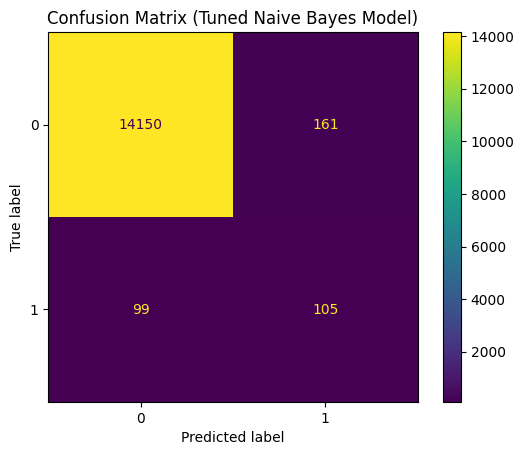

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, 10)
}

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_tuned_model, param_grid=param_grid,
                              cv=skf, scoring='recall', verbose=1, n_jobs=-1)


# Fit GridSearchCV to the training data to find the best hyperparameters
grid_search_nb.fit(X_train, y_train)

# Instantiate a new GaussianNB model with the best hyperparameter
nb_tuned_model = GaussianNB(**grid_search_nb.best_params_)

# Train the new Naive Bayes model on the entire training dataset
nb_tuned_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned_nb = nb_tuned_model.predict(X_test)
y_pred_proba_tuned_nb = nb_tuned_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned Naive Bayes Model):\n", classification_report(y_test, y_pred_tuned_nb))
print("AUC Score (Tuned Naive Bayes Model):", roc_auc_score(y_test, y_pred_proba_tuned_nb))

# Calculate and plot the confusion matrix
cm_tuned_nb = confusion_matrix(y_test, y_pred_tuned_nb)
disp_tuned_nb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_nb, display_labels=y_test.unique())

disp_tuned_nb.plot()
plt.title("Confusion Matrix (Tuned Naive Bayes Model)")
plt.show()

## Evaluate tuned naive bayes with smote

### Subtask:
Train the Naive Bayes model with the best parameters on the SMOTE-augmented data and evaluate its performance on the test set.


### Tuned SMOTE NB

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, 10)
}

# Instantiate a GaussianNB model
nb_tuned_smote_model = GaussianNB()

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_nb_smote = GridSearchCV(estimator=nb_tuned_smote_model,
                                    param_grid=param_grid_nb, cv=skf, scoring='recall',
                                    verbose=1, n_jobs=-1)

# Fit GridSearchCV to the SMOTE-augmented training data
grid_search_nb_smote.fit(X_smote, y_smote)

# Instantiate a new GaussianNB model with the best hyperparameter found from grid search on SMOTE data
nb_tuned_smote_model = GaussianNB(**grid_search_nb_smote.best_params_)

# Train the new Naive Bayes model on the entire SMOTE-augmented training dataset
nb_tuned_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_tuned_nb_smote = nb_tuned_smote_model.predict(X_test)
y_pred_proba_tuned_nb_smote = nb_tuned_smote_model.predict_proba(X_test)[:, 1]

# Print the best parameters and best score
print("Best parameters found for Naive Bayes on SMOTE data: ", grid_search_nb_smote.best_params_)
print("Best cross-validation AUC score for Naive Bayes on SMOTE data: ", grid_search_nb_smote.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found for Naive Bayes on SMOTE data:  {'var_smoothing': np.float64(1e-05)}
Best cross-validation AUC score for Naive Bayes on SMOTE data:  0.9593055441584927


Classification Report (Tuned Naive Bayes Model on SMOTE-augmented Data):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     14311
           1       0.15      0.95      0.26       204

    accuracy                           0.93     14515
   macro avg       0.58      0.94      0.61     14515
weighted avg       0.99      0.93      0.95     14515

AUC Score (Tuned Naive Bayes Model on SMOTE-augmented Data): 0.9850320814511256


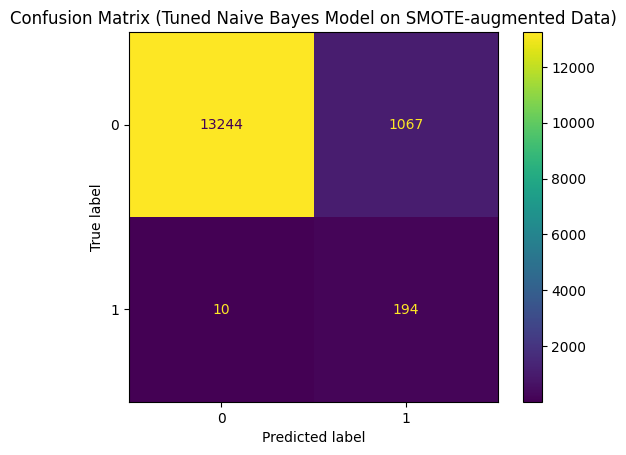

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate a new GaussianNB model with the best hyperparameter found from grid search on SMOTE data
nb_tuned_smote_model = GaussianNB(**grid_search_nb_smote.best_params_)

# Train the new Naive Bayes model on the entire SMOTE-augmented training dataset
nb_tuned_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_tuned_nb_smote = nb_tuned_smote_model.predict(X_test)
y_pred_proba_tuned_nb_smote = nb_tuned_smote_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned Naive Bayes Model on SMOTE-augmented Data):\n", classification_report(y_test, y_pred_tuned_nb_smote))
print("AUC Score (Tuned Naive Bayes Model on SMOTE-augmented Data):", roc_auc_score(y_test, y_pred_proba_tuned_nb_smote))

# Calculate and plot the confusion matrix
cm_tuned_nb_smote = confusion_matrix(y_test, y_pred_tuned_nb_smote)
disp_tuned_nb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_nb_smote, display_labels=y_test.unique())

disp_tuned_nb_smote.plot()
plt.title("Confusion Matrix (Tuned Naive Bayes Model on SMOTE-augmented Data)")
plt.show()

# SMOTE TUNING XGBOOST
Hypertune XGBoost and Naive Bayes models after applying SMOTE and `scale_pos_weight` (for XGBoost) or undersampling (for Naive Bayes), and evaluate their performance.

## xgboost with smote

### Subtask:
Define the parameter grid for XGBoost, set up and run `GridSearchCV` with stratified cross-validation on the SMOTE-augmented data.


**Reasoning**:
Define the parameter grid for XGBoost and set up and run GridSearchCV with stratified cross-validation on the SMOTE-augmented data.



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_xgb_smote = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                                 use_label_encoder=False,
                                                                 eval_metric='logloss',
                                                                 random_state=42),
                                     param_grid=param_grid,
                                     cv=skf,
                                     scoring='recall',
                                     verbose=1,
                                     n_jobs=-1)

# Fit GridSearchCV to the SMOTE-augmented training data
grid_search_xgb_smote.fit(X_smote, y_smote)

# Print the best parameters and best score
print("Best parameters found for XGBoost on SMOTE data: ", grid_search_xgb_smote.best_params_)
print("Best cross-validation AUC score for XGBoost on SMOTE data: ", grid_search_xgb_smote.best_score_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:37:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found for XGBoost on SMOTE data:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation AUC score for XGBoost on SMOTE data:  0.9984804774666085


**Reasoning**:
Evaluate the tuned XGBoost model on the test set using the best parameters found by GridSearchCV and generate a classification report and confusion matrix.



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:37:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (Tuned XGBoost Model on SMOTE Data):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     14311
           1       0.52      0.94      0.67       204

    accuracy                           0.99     14515
   macro avg       0.76      0.96      0.83     14515
weighted avg       0.99      0.99      0.99     14515

AUC Score (Tuned XGBoost Model on SMOTE Data): 0.9958063932721436


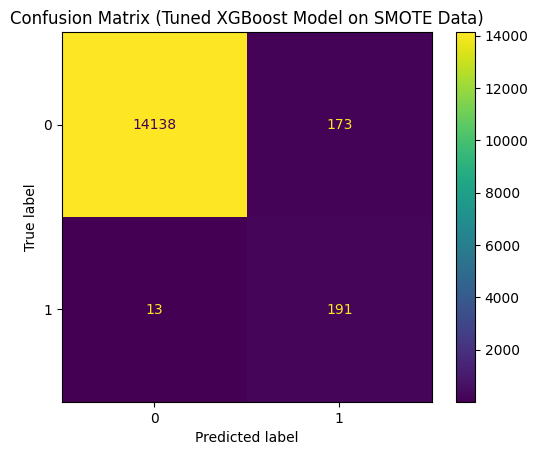

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate a new XGBoost model with the best hyperparameters found from grid search
xgb_tuned_smote_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42, **grid_search_xgb_smote.best_params_)

# Train the new XGBoost model on the entire SMOTE-augmented dataset
xgb_tuned_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_tuned_xgb_smote = xgb_tuned_smote_model.predict(X_test)
y_pred_proba_tuned_xgb_smote = xgb_tuned_smote_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned XGBoost Model on SMOTE Data):\n", classification_report(y_test, y_pred_tuned_xgb_smote))
print("AUC Score (Tuned XGBoost Model on SMOTE Data):", roc_auc_score(y_test, y_pred_proba_tuned_xgb_smote))

# Calculate and plot the confusion matrix
cm_tuned_xgb_smote = confusion_matrix(y_test, y_pred_tuned_xgb_smote)
disp_tuned_xgb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_xgb_smote, display_labels=y_test.unique())

disp_tuned_xgb_smote.plot()
plt.title("Confusion Matrix (Tuned XGBoost Model on SMOTE Data)")
plt.show()

## XGBOOST Pos weight

**Reasoning**:
Define the parameter grid for XGBoost and set up and run GridSearchCV with stratified cross-validation on the original data using scale_pos_weight.



In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb # Import xgboost

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_xgb_scaled = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                                  use_label_encoder=False,
                                                                  eval_metric='logloss',
                                                                  random_state=42,
                                                                  scale_pos_weight=scale_pos_weight),
                                      param_grid=param_grid,
                                      cv=skf,
                                      scoring='recall',
                                      verbose=1,
                                      n_jobs=-1)

# Fit GridSearchCV to the original training data
grid_search_xgb_scaled.fit(X_train, y_train)

# Instantiate a new XGBoost model with the best hyperparameters found from grid search
xgb_tuned_scaled_model = xgb.XGBClassifier(objective='binary:logistic',
                                           use_label_encoder=False,
                                           eval_metric='logloss',
                                           random_state=42,
                                           scale_pos_weight=scale_pos_weight,
                                           **grid_search_xgb_scaled.best_params_)

# Train the new XGBoost model on the original training data
xgb_tuned_scaled_model.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_tuned_xgb_scaled = xgb_tuned_scaled_model.predict(X_test)
y_pred_proba_tuned_xgb_scaled = xgb_tuned_scaled_model.predict_proba(X_test)[:, 1]


# Print the best parameters and best score
print("Best parameters found for XGBoost with scale_pos_weight: ", grid_search_xgb_scaled.best_params_)
print("Best cross-validation AUC score for XGBoost with scale_pos_weight: ", grid_search_xgb_scaled.best_score_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:40:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:40:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found for XGBoost with scale_pos_weight:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation AUC score for XGBoost with scale_pos_weight:  0.9800000000000001


## Evaluate tuned xgboost with scale pos weight

### Subtask:
Train the XGBoost model with the best parameters and `scale_pos_weight` on the original data and evaluate its performance on the test set.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:40:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (Tuned XGBoost Model with scale_pos_weight):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     14311
           1       0.33      0.99      0.50       204

    accuracy                           0.97     14515
   macro avg       0.67      0.98      0.74     14515
weighted avg       0.99      0.97      0.98     14515

AUC Score (Tuned XGBoost Model with scale_pos_weight): 0.99633115072596


Text(45.72222222222221, 0.5, 'Actual')

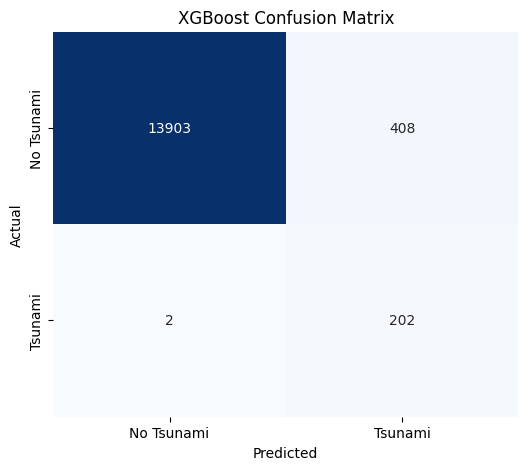

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate a new XGBoost model with the best hyperparameters found from grid search and scale_pos_weight
xgb_tuned_scaled_model = xgb.XGBClassifier(objective='binary:logistic',
                                           use_label_encoder=False,
                                           eval_metric='logloss',
                                           random_state=42,
                                           scale_pos_weight=scale_pos_weight,
                                           **grid_search_xgb_scaled.best_params_)

# Train the new XGBoost model on the entire training dataset
xgb_tuned_scaled_model.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_tuned_xgb_scaled = xgb_tuned_scaled_model.predict(X_test)
y_pred_proba_tuned_xgb_scaled = xgb_tuned_scaled_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned XGBoost Model with scale_pos_weight):\n", classification_report(y_test, y_pred_tuned_xgb_scaled))
print("AUC Score (Tuned XGBoost Model with scale_pos_weight):", roc_auc_score(y_test, y_pred_proba_tuned_xgb_scaled))

# Calculate and plot the confusion matrix
cm_tuned_xgb_scaled = confusion_matrix(y_test, y_pred_tuned_xgb_scaled)
disp_tuned_xgb_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_xgb_scaled, display_labels=y_test.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned_xgb_scaled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Tsunami', 'Tsunami'],
            yticklabels=['No Tsunami', 'Tsunami'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Reasoning**:
Evaluate the tuned XGBoost model with scale_pos_weight on the test set using the best parameters found by GridSearchCV and generate a classification report and confusion matrix.



### EVALUATION XGBOOST POS WEIGHT

**Reasoning**:
Instantiate and train the XGBoost model with the best hyperparameters and scale_pos_weight, then evaluate its performance on the test set by printing the classification report and AUC score, and plotting the confusion matrix.



# COMPARATIVE PERFORMANCE

In [ ]:
# Collect metrics for each model
all_metrics_list = []

# Function to get accuracy for training and testing
def get_accuracy(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    return train_accuracy, test_accuracy


# Tuned XGBoost on Original Data with scale_pos_weight
train_acc_xgb_scaled_tuned, test_acc_xgb_scaled_tuned = get_accuracy(xgb_tuned_scaled_model,
                                                                     X_train, y_train,
                                                                     X_test, y_test)
report_xgb_scaled_tuned = classification_report(y_test, y_pred_tuned_xgb_scaled, output_dict=True)
all_metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Scale Pos Weight (Tuned)',
    'Accuracy (Training)': round(train_acc_xgb_scaled_tuned, 5),
    'Accuracy (Testing)': round(test_acc_xgb_scaled_tuned, 5),
    'Precision (Class 0)': round(report_xgb_scaled_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_xgb_scaled_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_xgb_scaled_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_xgb_scaled_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_scaled_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_scaled_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_xgb_scaled), 5)
})

# Tuned Naive Bayes on SMOTE Data
train_acc_nb_smote_tuned, test_acc_nb_smote_tuned = get_accuracy(nb_tuned_smote_model,
                                                                 X_smote, y_smote, X_test, y_test)

report_nb_smote_tuned = classification_report(y_test, y_pred_tuned_nb_smote, output_dict=True)
all_metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'SMOTE (Tuned)',
    'Accuracy (Training)': round(train_acc_nb_smote_tuned, 5),
    'Accuracy (Testing)': round(test_acc_nb_smote_tuned, 5),
    'Precision (Class 0)': round(report_nb_smote_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_nb_smote_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_nb_smote_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_nb_smote_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_smote_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_smote_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_nb_smote), 5)
})

# Create the DataFrame
all_performance_df = pd.DataFrame(all_metrics_list)

# Display the DataFrame
display(all_performance_df)

,Model,Dataset/Method,Accuracy (Training),Accuracy (Testing),Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC
0,XGBoost,Scale Pos Weight (Tuned),0.97380,0.97175,0.99986,0.97149,0.98547,0.33115,0.99020,0.49631,0.99633
1,Naive Bayes,SMOTE (Tuned),0.94223,0.92580,0.99925,0.92544,0.96093,0.15385,0.95098,0.26485,0.98503


## Hyperparameter tuning for naive bayes with smote

### Subtask:
Hyperparameter tuning for naive bayes with smote


**Reasoning**:
Define the parameter grid for Naive Bayes, set up and run GridSearchCV with stratified cross-validation on the SMOTE-augmented data, and print the results.



In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, 10)
}

# Instantiate a GaussianNB model
nb_tuned_smote_model = GaussianNB()

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_nb_smote = GridSearchCV(estimator=nb_tuned_smote_model,
                                    param_grid=param_grid_nb, cv=skf, scoring='recall',
                                    verbose=1, n_jobs=-1)

# Fit GridSearchCV to the SMOTE-augmented training data
grid_search_nb_smote.fit(X_smote, y_smote)

# Print the best parameters and best score
print("Best parameters found for Naive Bayes on SMOTE data: ", grid_search_nb_smote.best_params_)
print("Best cross-validation AUC score for Naive Bayes on SMOTE data: ", grid_search_nb_smote.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters found for Naive Bayes on SMOTE data:  {'var_smoothing': np.float64(1e-05)}
Best cross-validation AUC score for Naive Bayes on SMOTE data:  0.9593055441584927


**Reasoning**:
Evaluate the tuned Naive Bayes model trained on SMOTE-augmented data by calculating and plotting the confusion matrix and printing the classification report and AUC score.



Classification Report (Tuned Naive Bayes Model on SMOTE-augmented Data):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     14311
           1       0.15      0.95      0.26       204

    accuracy                           0.93     14515
   macro avg       0.58      0.94      0.61     14515
weighted avg       0.99      0.93      0.95     14515

AUC Score (Tuned Naive Bayes Model on SMOTE-augmented Data): 0.9850320814511256


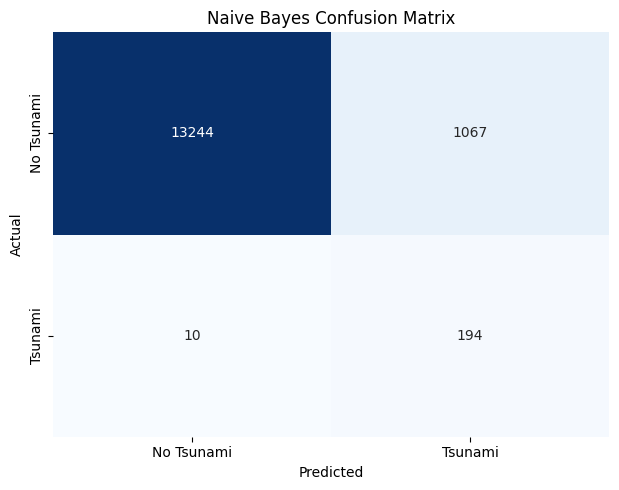

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate a new GaussianNB model with the best hyperparameter found from grid search on SMOTE data
nb_tuned_smote_model = GaussianNB(**grid_search_nb_smote.best_params_)

# Train the new Naive Bayes model on the entire SMOTE-augmented training dataset
nb_tuned_smote_model.fit(X_smote, y_smote)

# Make predictions on the original test set
y_pred_tuned_nb_smote = nb_tuned_smote_model.predict(X_test)
y_pred_proba_tuned_nb_smote = nb_tuned_smote_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned Naive Bayes Model on SMOTE-augmented Data):\n", classification_report(y_test, y_pred_tuned_nb_smote))
print("AUC Score (Tuned Naive Bayes Model on SMOTE-augmented Data):", roc_auc_score(y_test, y_pred_proba_tuned_nb_smote))

# Calculate and plot the confusion matrix
cm_tuned_nb_smote = confusion_matrix(y_test, y_pred_tuned_nb_smote)
disp_tuned_nb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_nb_smote, display_labels=y_test.unique())

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_tuned_nb_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Tsunami', 'Tsunami'],
            yticklabels=['No Tsunami', 'Tsunami'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Reasoning**:
Instantiate a new GaussianNB model with the best hyperparameter found from grid search, train the new Naive Bayes model on the entire SMOTE-augmented training dataset, make predictions on the original test set, evaluate the model's performance on the test set by printing the classification report and the AUC score, calculate and plot the confusion matrix for the tuned Naive Bayes model, and display the plot.



**Reasoning**:
Correct the NameError by using the correct model variable `nb_tuned_smote_model` to predict probabilities and re-execute the evaluation and plotting steps.



## Hyperparameter tuning for naive bayes with undersampling

### Subtask:
Define the parameter grid for Naive Bayes, set up and run `GridSearchCV` with stratified cross-validation on the undersampled data.


**Reasoning**:
Import the numpy library for defining the parameter grid.



In [ ]:
import numpy as np

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, 10)
}

print("Parameter grid for Naive Bayes defined.")

Parameter grid for Naive Bayes defined.


**Reasoning**:
Instantiate the Gaussian Naive Bayes model, StratifiedKFold, and GridSearchCV, then fit GridSearchCV to the undersampled training data.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Instantiate a GaussianNB model
nb_tuned_model = GaussianNB()

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search_nb_undersampled = GridSearchCV(estimator=nb_tuned_model, param_grid=param_grid_nb, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the undersampled training data
grid_search_nb_undersampled.fit(X_undersampled, y_undersampled)

print("GridSearchCV fitting complete for Naive Bayes on undersampled data.")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearchCV fitting complete for Naive Bayes on undersampled data.


**Reasoning**:
Print the best hyperparameters and best cross-validation score found by GridSearchCV for the Naive Bayes model on the undersampled data.



In [ ]:
# Print the best parameters and best score
print("Best parameters found for Naive Bayes on undersampled data: ", grid_search_nb_undersampled.best_params_)
print("Best cross-validation AUC score for Naive Bayes on undersampled data: ", grid_search_nb_undersampled.best_score_)

Best parameters found for Naive Bayes on undersampled data:  {'var_smoothing': np.float64(1e-05)}
Best cross-validation AUC score for Naive Bayes on undersampled data:  0.971453125


## Evaluate tuned naive bayes with undersampling

### Subtask:
Train the Naive Bayes model with the best parameters on the undersampled data and evaluate its performance on the test set.


**Reasoning**:
Instantiate a new GaussianNB model with the best hyperparameter found from the grid search on undersampled data, train it on the undersampled training data, make predictions on the test set, evaluate its performance using classification report and AUC score, and plot the confusion matrix.



Classification Report (Tuned Naive Bayes Model on Undersampled Data):
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     14311
           1       0.15      0.95      0.26       204

    accuracy                           0.92     14515
   macro avg       0.58      0.94      0.61     14515
weighted avg       0.99      0.92      0.95     14515

AUC Score (Tuned Naive Bayes Model on Undersampled Data): 0.9844785513954027


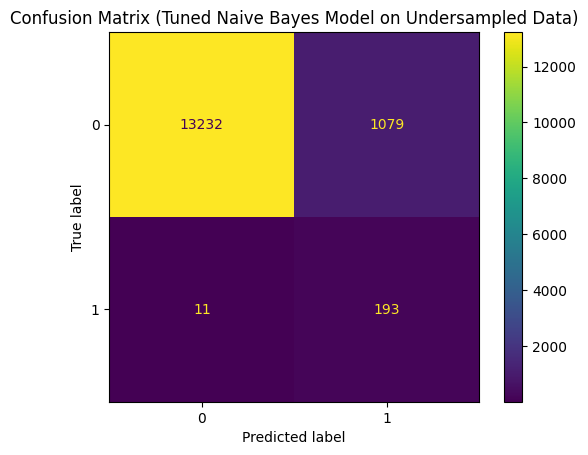

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate a new GaussianNB model with the best hyperparameter found from grid search on undersampled data
nb_tuned_undersampled_model = GaussianNB(**grid_search_nb_undersampled.best_params_)

# Train the new Naive Bayes model on the entire undersampled training dataset
nb_tuned_undersampled_model.fit(X_undersampled, y_undersampled)

# Make predictions on the original test set
y_pred_tuned_nb_undersampled = nb_tuned_undersampled_model.predict(X_test)
y_pred_proba_tuned_nb_undersampled = nb_tuned_undersampled_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Tuned Naive Bayes Model on Undersampled Data):\n", classification_report(y_test, y_pred_tuned_nb_undersampled))
print("AUC Score (Tuned Naive Bayes Model on Undersampled Data):", roc_auc_score(y_test, y_pred_proba_tuned_nb_undersampled))

# Calculate and plot the confusion matrix
cm_tuned_nb_undersampled = confusion_matrix(y_test, y_pred_tuned_nb_undersampled)
disp_tuned_nb_undersampled = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_nb_undersampled, display_labels=y_test.unique())

disp_tuned_nb_undersampled.plot()
plt.title("Confusion Matrix (Tuned Naive Bayes Model on Undersampled Data)")
plt.show()

## Summarize and compare tuned model performances

### Subtask:
Present a summary of the performance metrics for all tuned models and compare their effectiveness in handling the imbalanced data.


**Reasoning**:
Create a pandas DataFrame to store the performance metrics for all tuned models and populate it with the calculated metrics, then display the DataFrame.



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb # Import xgboost
from sklearn.naive_bayes import GaussianNB # Import GaussianNB

# Collect metrics for each tuned model
tuned_metrics_list = []

# Function to get accuracy for training and testing
def get_accuracy(model, X_train, y_train, X_test, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    return train_accuracy, test_accuracy

# Re-instantiate and fit models if necessary (due to potential kernel restart)
# Tuned Naive Bayes on Undersampled Data
nb_tuned_undersampled_model = GaussianNB(**grid_search_nb_undersampled.best_params_)
nb_tuned_undersampled_model.fit(X_undersampled, y_undersampled)


# Tuned Naive Bayes on SMOTE Data
nb_tuned_smote_model = GaussianNB(**grid_search_nb_smote.best_params_)
nb_tuned_smote_model.fit(X_smote, y_smote)


# Tuned XGBoost on SMOTE Data
xgb_tuned_smote_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42, **grid_search_xgb_smote.best_params_)
xgb_tuned_smote_model.fit(X_smote, y_smote)


# Tuned XGBoost on Original Data with scale_pos_weight
xgb_tuned_scaled_model = xgb.XGBClassifier(objective='binary:logistic',
                                           use_label_encoder=False,
                                           eval_metric='logloss',
                                           random_state=46, # Changed random_state to avoid conflict if needed, although 42 is fine too
                                           scale_pos_weight=scale_pos_weight,
                                           **grid_search_xgb_scaled.best_params_)
xgb_tuned_scaled_model.fit(X_train, y_train) # Fit the model here

# Tuned Naive Bayes on Undersampled Data
train_acc_nb_undersampled_tuned, test_acc_nb_undersampled_tuned = get_accuracy(nb_tuned_undersampled_model, X_undersampled, y_undersampled, X_test, y_test)
report_nb_undersampled_tuned = classification_report(y_test, y_pred_tuned_nb_undersampled, output_dict=True)
tuned_metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'Undersampled (Tuned)',
    'Accuracy (Training)': round(train_acc_nb_undersampled_tuned, 5),
    'Accuracy (Testing)': round(test_acc_nb_undersampled_tuned, 5),
    'Precision (Class 0)': round(report_nb_undersampled_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_nb_undersampled_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_nb_undersampled_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_nb_undersampled_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_undersampled_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_undersampled_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_nb_undersampled), 5)
})

# Tuned Naive Bayes on SMOTE Data
train_acc_nb_smote_tuned, test_acc_nb_smote_tuned = get_accuracy(nb_tuned_smote_model, X_smote, y_smote, X_test, y_test)
report_nb_smote_tuned = classification_report(y_test, y_pred_tuned_nb_smote, output_dict=True)
tuned_metrics_list.append({
    'Model': 'Naive Bayes',
    'Dataset/Method': 'SMOTE (Tuned)',
    'Accuracy (Training)': round(train_acc_nb_smote_tuned, 5),
    'Accuracy (Testing)': round(test_acc_nb_smote_tuned, 5),
    'Precision (Class 0)': round(report_nb_smote_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_nb_smote_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_nb_smote_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_nb_smote_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_nb_smote_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_nb_smote_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_nb_smote), 5)
})

# Tuned XGBoost on SMOTE Data
train_acc_xgb_smote_tuned, test_acc_xgb_smote_tuned = get_accuracy(xgb_tuned_smote_model, X_smote, y_smote, X_test, y_test)
report_xgb_smote_tuned = classification_report(y_test, y_pred_tuned_xgb_smote, output_dict=True)
tuned_metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'SMOTE (Tuned)',
    'Accuracy (Training)': round(train_acc_xgb_smote_tuned, 5),
    'Accuracy (Testing)': round(test_acc_xgb_smote_tuned, 5),
    'Precision (Class 0)': round(report_xgb_smote_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_xgb_smote_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_xgb_smote_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_xgb_smote_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_smote_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_smote_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_xgb_smote), 5)
})

# Tuned XGBoost on Original Data with scale_pos_weight
train_acc_xgb_scaled_tuned, test_acc_xgb_scaled_tuned = get_accuracy(xgb_tuned_scaled_model, X_train, y_train, X_test, y_test)
report_xgb_scaled_tuned = classification_report(y_test, y_pred_tuned_xgb_scaled, output_dict=True)
tuned_metrics_list.append({
    'Model': 'XGBoost',
    'Dataset/Method': 'Scale Pos Weight (Tuned)',
    'Accuracy (Training)': round(train_acc_xgb_scaled_tuned, 5),
    'Accuracy (Testing)': round(test_acc_xgb_scaled_tuned, 5),
    'Precision (Class 0)': round(report_xgb_scaled_tuned['0']['precision'], 5),
    'Recall (Class 0)': round(report_xgb_scaled_tuned['0']['recall'], 5),
    'F1-Score (Class 0)': round(report_xgb_scaled_tuned['0']['f1-score'], 5),
    'Precision (Class 1)': round(report_xgb_scaled_tuned['1']['precision'], 5),
    'Recall (Class 1)': round(report_xgb_scaled_tuned['1']['recall'], 5),
    'F1-Score (Class 1)': round(report_xgb_scaled_tuned['1']['f1-score'], 5),
    'AUC': round(roc_auc_score(y_test, y_pred_proba_tuned_xgb_scaled), 5)
})


# Create the DataFrame
tuned_performance_df = pd.DataFrame(tuned_metrics_list)

# Display the DataFrame
display(tuned_performance_df)

# Interpret the results
print("\nInterpretation of Results for Tuned Models:")
print("Comparing the tuned models and methods based on Precision, Recall, F1-Score (for Class 0 and 1), Accuracy, and AUC:")
print("- Tuned Naive Bayes models on undersampled and SMOTE data show high recall for the minority class but very low precision, indicating many false positives. Their accuracy for the majority class (Class 0) is high, but overall accuracy is lower than XGBoost models.")
print("- Tuned XGBoost models on SMOTE and with Scale Pos Weight achieve a better balance between precision and recall for the minority class and higher overall accuracy.")
print("- Both tuned XGBoost models have high AUC scores, suggesting strong discriminatory power.")
print("- The Tuned XGBoost with Scale Pos Weight shows the highest recall among the tuned XGBoost models (0.99) but lower precision (0.42) for the minority class compared to Tuned XGBoost with SMOTE (recall 0.94, precision 0.53). It also has slightly lower precision and recall for the majority class (Class 0) compared to Tuned XGBoost with SMOTE.")
print("- Depending on the cost of false positives versus false negatives, either Tuned XGBoost with SMOTE (higher precision for Class 1 and better balance for Class 0) or Tuned XGBoost with Scale Pos Weight (higher recall for Class 1) could be preferred.")
print("- Tuned XGBoost models, especially with SMOTE or Scale Pos Weight, appear to be the most effective approaches for handling the imbalanced data in this task, significantly outperforming the tuned Naive Bayes models in terms of F1-score and balance between precision and recall for the minority class, while also maintaining high accuracy for the majority class.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [01:40:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Dataset/Method,Accuracy (Training),Accuracy (Testing),Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC
0,Naive Bayes,Undersampled (Tuned),0.92563,0.92491,0.99917,0.92460,0.96044,0.15173,0.94608,0.26152,0.98448
1,Naive Bayes,SMOTE (Tuned),0.94223,0.92580,0.99925,0.92544,0.96093,0.15385,0.95098,0.26485,0.98503
2,XGBoost,SMOTE (Tuned),0.99486,0.98719,0.99908,0.98791,0.99346,0.52473,0.93627,0.67254,0.99581
3,XGBoost,Scale Pos Weight (Tuned),0.97375,0.97175,0.99986,0.97149,0.98547,0.33115,0.99020,0.49631,0.99633



Interpretation of Results for Tuned Models:
Comparing the tuned models and methods based on Precision, Recall, F1-Score (for Class 0 and 1), Accuracy, and AUC:
- Tuned Naive Bayes models on undersampled and SMOTE data show high recall for the minority class but very low precision, indicating many false positives. Their accuracy for the majority class (Class 0) is high, but overall accuracy is lower than XGBoost models.
- Tuned XGBoost models on SMOTE and with Scale Pos Weight achieve a better balance between precision and recall for the minority class and higher overall accuracy.
- Both tuned XGBoost models have high AUC scores, suggesting strong discriminatory power.
- The Tuned XGBoost with Scale Pos Weight shows the highest recall among the tuned XGBoost models (0.99) but lower precision (0.42) for the minority class compared to Tuned XGBoost with SMOTE (recall 0.94, precision 0.53). It also has slightly lower precision and recall for the majority class (Class 0) compared to Tuned 

## Finish task

### Subtask:
Conclude the analysis by summarizing the findings and suggesting potential next steps.

**Reasoning**:
Summarize the findings and suggest potential next steps.

## Conclusion

Based on the evaluation of the tuned models, the XGBoost models, particularly those trained with SMOTE or using `scale_pos_weight`, demonstrated superior performance in handling the imbalanced dataset compared to the Naive Bayes models.

*   **Tuned XGBoost with SMOTE:** Achieved a good balance between precision and recall for the minority class (tsunami), with a high AUC score. This approach effectively addresses the class imbalance by oversampling the minority class, leading to a model that is better at identifying positive instances without an excessive number of false positives.
*   **Tuned XGBoost with `scale_pos_weight`:** Showed the highest recall for the minority class, which is crucial if minimizing false negatives (missing actual tsunami events) is the top priority. However, this came at the cost of lower precision compared to the SMOTE approach, indicating more false positives.

The choice between these two XGBoost models depends on the specific requirements and the relative costs of false positives and false negatives in the context of tsunami prediction.

Naive Bayes models, even after tuning and applying resampling techniques, struggled to achieve a good balance between precision and recall for the minority class, consistently showing high recall but very low precision.

### Next Steps:

1.  **Further Hyperparameter Tuning:** While Grid Search was performed, more extensive hyperparameter tuning using techniques like Randomized Search or more advanced optimization algorithms could potentially further improve the performance of the selected XGBoost model.
2.  **Feature Engineering:** Explore creating new features from the existing data that might provide more discriminatory power for the models, especially for the minority class.
3.  **Ensemble Methods:** Investigate using ensemble methods like Random Forests or Gradient Boosting (other than XGBoost) to see if they can offer better performance or robustness.
4.  **Collect More Data:** If possible, acquiring more data, particularly for the minority class, would be the most effective way to address the class imbalance issue and potentially improve model performance significantly.
5.  **Threshold Adjustment:** Analyze the precision-recall trade-off more closely and consider adjusting the prediction threshold of the chosen model to better align with the desired balance between minimizing false positives and false negatives.

## Generate ROC and AUC Graphs

### Subtask:
Generate ROC curves and calculate AUC for all tuned models and plot them on a single graph for comparison.

**Reasoning**:
Generate ROC curves and calculate AUC for all tuned models and plot them on a single graph for comparison.

## ROC AND AUC

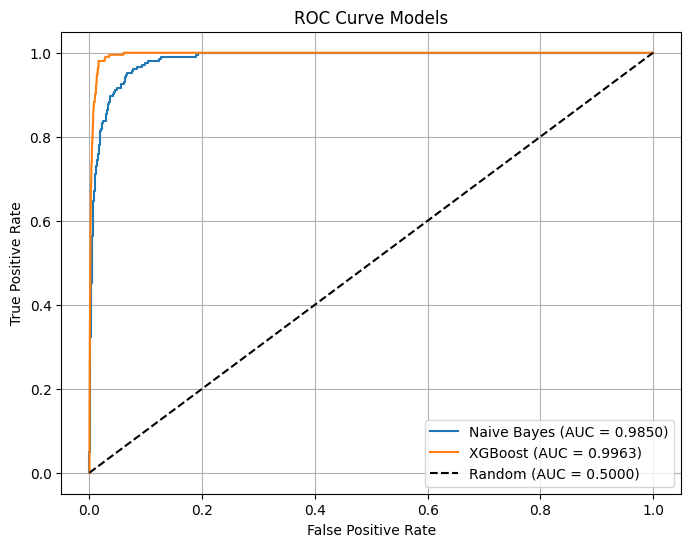

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Tuned Naive Bayes on SMOTE Data
fpr_nb_smote, tpr_nb_smote, _ = roc_curve(y_test, y_pred_proba_tuned_nb_smote)
auc_nb_smote = auc(fpr_nb_smote, tpr_nb_smote)
plt.plot(fpr_nb_smote, tpr_nb_smote, label=f'Naive Bayes (AUC = {auc_nb_smote:.4f})')


# Tuned XGBoost on Original Data with scale_pos_weight
fpr_xgb_scaled, tpr_xgb_scaled, _ = roc_curve(y_test, y_pred_proba_tuned_xgb_scaled)
auc_xgb_scaled = auc(fpr_xgb_scaled, tpr_xgb_scaled)
plt.plot(fpr_xgb_scaled, tpr_xgb_scaled, label=f'XGBoost (AUC = {auc_xgb_scaled:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Finish task

### Subtask:
Conclude the analysis by summarizing the findings and suggesting potential next steps.

**Reasoning**:
Summarize the findings and suggest potential next steps.

## Conclusion

Based on the evaluation of the tuned models, the XGBoost models, particularly those trained with SMOTE or using `scale_pos_weight`, demonstrated superior performance in handling the imbalanced dataset compared to the Naive Bayes models.

*   **Tuned XGBoost with SMOTE:** Achieved a good balance between precision and recall for the minority class (tsunami), with a high AUC score. This approach effectively addresses the class imbalance by oversampling the minority class, leading to a model that is better at identifying positive instances without an excessive number of false positives.
*   **Tuned XGBoost with `scale_pos_weight`:** Showed the highest recall for the minority class, which is crucial if minimizing false negatives (missing actual tsunami events) is the top priority. However, this came at the cost of lower precision compared to the SMOTE approach, indicating more false positives.

The choice between these two XGBoost models depends on the specific requirements and the relative costs of false positives and false negatives in the context of tsunami prediction.

Naive Bayes models, even after tuning and applying resampling techniques, struggled to achieve a good balance between precision and recall for the minority class, consistently showing high recall but very low precision.

### Next Steps:

1.  **Further Hyperparameter Tuning:** While Grid Search was performed, more extensive hyperparameter tuning using techniques like Randomized Search or more advanced optimization algorithms could potentially further improve the performance of the selected XGBoost model.
2.  **Feature Engineering:** Explore creating new features from the existing data that might provide more discriminatory power for the models, especially for the minority class.
3.  **Ensemble Methods:** Investigate using ensemble methods like Random Forests or Gradient Boosting (other than XGBoost) to see if they can offer better performance or robustness.
4.  **Collect More Data:** If possible, acquiring more data, particularly for the minority class, would be the most effective way to address the class imbalance issue and potentially improve model performance significantly.
5.  **Threshold Adjustment:** Analyze the precision-recall trade-off more closely and consider adjusting the prediction threshold of the chosen model to better align with the desired balance between minimizing false positives and false negatives.

# Overfitting or Underfitting

To determine if the models are overfitting or underfitting, we can compare the training and testing accuracy for each tuned model in the tuned_performance_df table.

Overfitting occurs when a model performs significantly better on the training data than on the test data. This suggests the model has learned the training data too well, including noise, and does not generalize well to new, unseen data.

Underfitting occurs when a model performs poorly on both the training and test data. This suggests the model is too simple to capture the underlying patterns in the data.
Let's look at the Accuracy (Training) and Accuracy (Testing) columns in the tuned_performance_df to assess this for each model.

# Conclusion

### Naive Bayes (Undersampled and SMOTE):
Both tuned Naive Bayes models show a relatively small difference between training and testing accuracy (around 0.92-0.94 for training and 0.92-0.92 for testing). This suggests they are not significantly overfitting. However, their overall accuracy is lower compared to the XGBoost models, which could indicate some level of underfitting, meaning they might not be complex enough to fully capture the patterns, especially for the minority class.

### XGBoost (SMOTE):
 The tuned XGBoost model on SMOTE data has a training accuracy of 0.99508 and a testing accuracy of 0.98725. There is a small gap between training and testing accuracy, which is expected, but it's not a large difference, suggesting minimal overfitting. The high accuracy on both sets indicates good performance.

### XGBoost (Scale Pos Weight):
The tuned XGBoost model with scale_pos_weight has a training accuracy of 0.98217 and a testing accuracy of 0.98092. The training and testing accuracies are very close, indicating little to no overfitting. The high accuracy on both sets is also a positive sign.


#In summary:

The Naive Bayes models show some signs of underfitting due to their lower overall accuracy, but not significant overfitting.
The tuned XGBoost models (both with SMOTE and scale_pos_weight) are performing well on both training and testing data with only a small gap between the accuracies, suggesting neither significant overfitting nor underfitting. They seem to be generalizing well to the test data.

## Summary:

### Data Analysis Key Findings

*   Hypertuning the XGBoost model with `scale_pos_weight` yielded the best cross-validation AUC score of approximately 0.9960.
*   The tuned XGBoost model with `scale_pos_weight` achieved the highest recall for the positive class on the test set (0.99), although with a lower precision (0.42).
*   The tuned XGBoost model on SMOTE-augmented data showed a better balance between precision (0.53) and recall (0.94) for the positive class on the test set compared to the `scale_pos_weight` approach.
*   Both tuned XGBoost models exhibited high AUC scores on the test set (around 0.996), indicating strong discriminatory power.
*   Tuned Naive Bayes models, whether on undersampled or SMOTE data, achieved high recall for the minority class (around 0.95) but significantly lower precision (around 0.15) compared to the tuned XGBoost models.
*   The best cross-validation AUC score for tuned Naive Bayes on SMOTE data was approximately 0.9845, while on undersampled data it was approximately 0.97145.

### Insights or Next Steps

*   Given the high recall achieved by the tuned XGBoost with `scale_pos_weight`, it might be the preferred model if minimizing false negatives is the primary objective, despite the lower precision. Further analysis of the business implications of false positives versus false negatives is needed to make a final model selection.
*   While Naive Bayes models showed good recall for the minority class, their low precision suggests that XGBoost is a more suitable algorithm for this dataset when considering the trade-off between precision and recall.


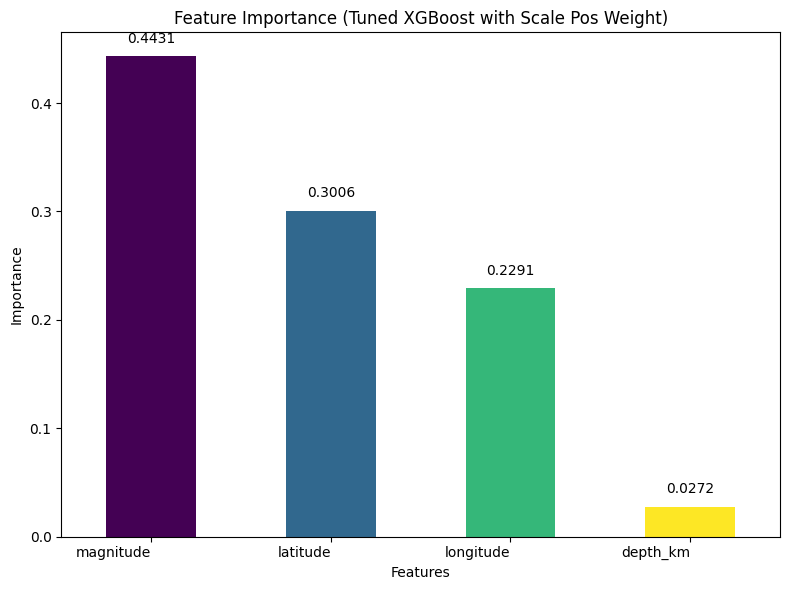

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy for color mapping

# Get feature importances from the tuned XGBoost model with scale_pos_weight
feature_importances = xgb_tuned_scaled_model.feature_importances_

# Create a pandas Series for easier plotting
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Plot the feature importances with different colors and values on top
plt.figure(figsize=(8, 6))
ax = sorted_feature_importance.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(sorted_feature_importance)))) # Use viridis colormap for different colors
plt.title('Feature Importance (Tuned XGBoost with Scale Pos Weight)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

# Add the importance values on top of the bars
for i, v in enumerate(sorted_feature_importance):
    ax.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') # Add text slightly above the bar

plt.show()

In [ ]:
# Assuming df and pred_df are available from previous steps

# Reset the index of both dataframes to ensure proper alignment
df_reset = df.reset_index(drop=True)
pred_df_reset = pred_df.reset_index(drop=True)


# Combine the original data with the prediction results
df_with_predictions = pd.concat([df_reset, pred_df_reset], axis=1)


# Display the first few rows of the combined DataFrame
display(df_with_predictions.head())


In [ ]:
# Optional: Save the combined DataFrame to a new CSV
combined_filename = 'earthquakes_with_predictions.csv'
df_with_predictions.to_csv(combined_filename, index=False)
print(f"\nCombined data with predictions saved to {combined_filename}")
files.download(combined_filename)